2.16.1
A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 6d958be074577803d12ecdefd02955f39262c83c16fe9348329d7fe0b5c001ce so we will re-download the data.
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 30s 0us/step


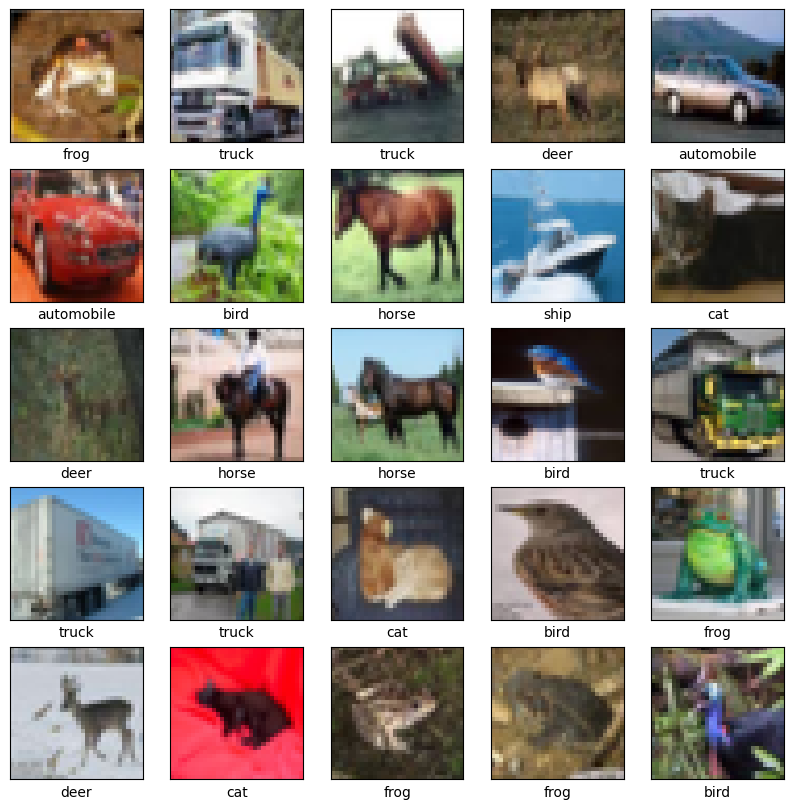

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3425 - loss: 1.7767 - val_accuracy: 0.5531 - val_loss: 1.2425
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5728 - loss: 1.1965 - val_accuracy: 0.6274 - val_loss: 1.0521
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6422 - loss: 1.0148 - val_accuracy: 0.6610 - val_loss: 0.9637
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6767 - loss: 0.9124 - val_accuracy: 0.6610 - val_loss: 0.9555
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7084 - loss: 0.8290 - val_accuracy: 0.6966 - val_loss: 0.8721
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7296 - loss: 0.7742 - val_accuracy: 0.6946 - val_loss: 0.8870
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7513 - loss: 0.7081 - val_accuracy: 0.6991 - val_loss: 0.8568
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7656 - loss: 0.6732 - 

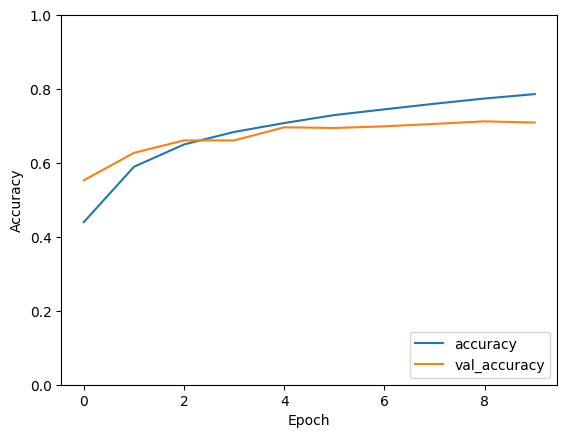

313/313 - 0s - 1ms/step - accuracy: 0.7094 - loss: 0.8679
Test accuracy: 0.7093999981880188


In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# 1. Mengimpor pustaka yang diperlukan
# Mengatur ulang tensorflow untuk mencetak versi yang dipakai
print(tf.__version__)

# 2. Memuat dan melakukan prapemrosesan dataset CIFAR-10
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalisasi nilai piksel ke rentang 0-1
train_images, test_images = train_images / 255.0, test_images / 255.0

# 3. Menampilkan beberapa gambar dari dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# 4. Membangun model jaringan saraf konvolusional (CNN)
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

# Menampilkan arsitektur model
model.summary()

# 5. Melatih model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

# 6. Mengevaluasi model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


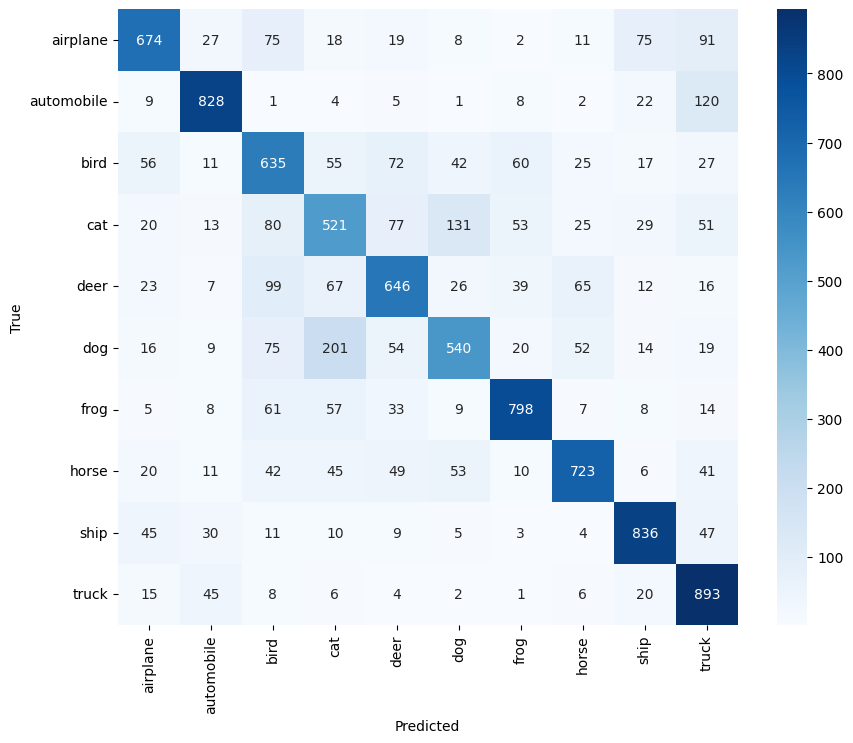

In [9]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
# Prediksi pada data pengujian
y_pred = model.predict(test_images)
y_pred_classes = [np.argmax(element) for element in y_pred]

# Membuat confusion matrix
cm = confusion_matrix(test_labels, y_pred_classes)

# Menampilkan confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


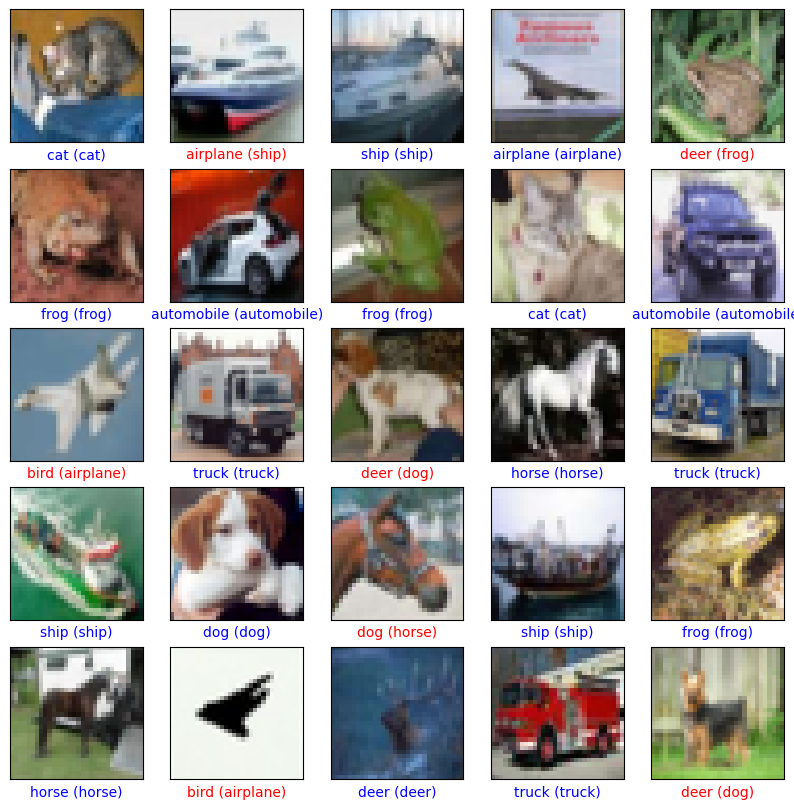

In [10]:
# Menampilkan beberapa gambar pengujian bersama dengan prediksi model
num_rows, num_cols = 5, 5
num_images = num_rows * num_cols
plt.figure(figsize=(2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = class_names[y_pred_classes[i]]
    true_label = class_names[test_labels[i][0]]
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel(f"{predicted_label} ({true_label})", color=color)
plt.show()


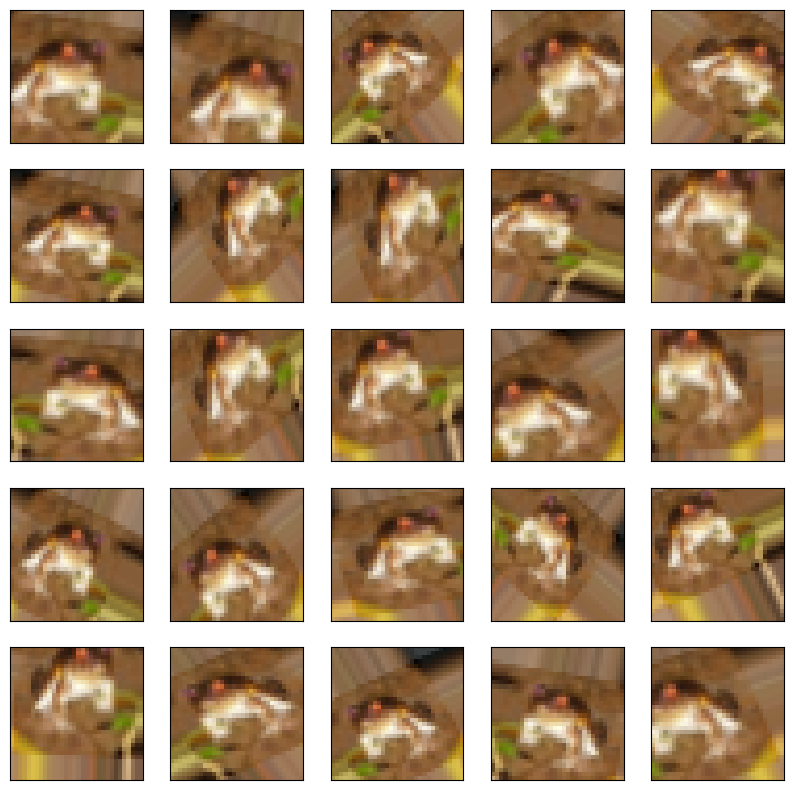

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Membuat ImageDataGenerator dengan augmentasi
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Memilih satu gambar untuk augmentasi
sample_image = train_images[0]
sample_image = sample_image.reshape((1,) + sample_image.shape)

# Menampilkan hasil augmentasi
plt.figure(figsize=(10, 10))
i = 0
for batch in datagen.flow(sample_image, batch_size=1):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(batch[0])
    i += 1
    if i % 25 == 0:
        break
plt.show()


2.16.1


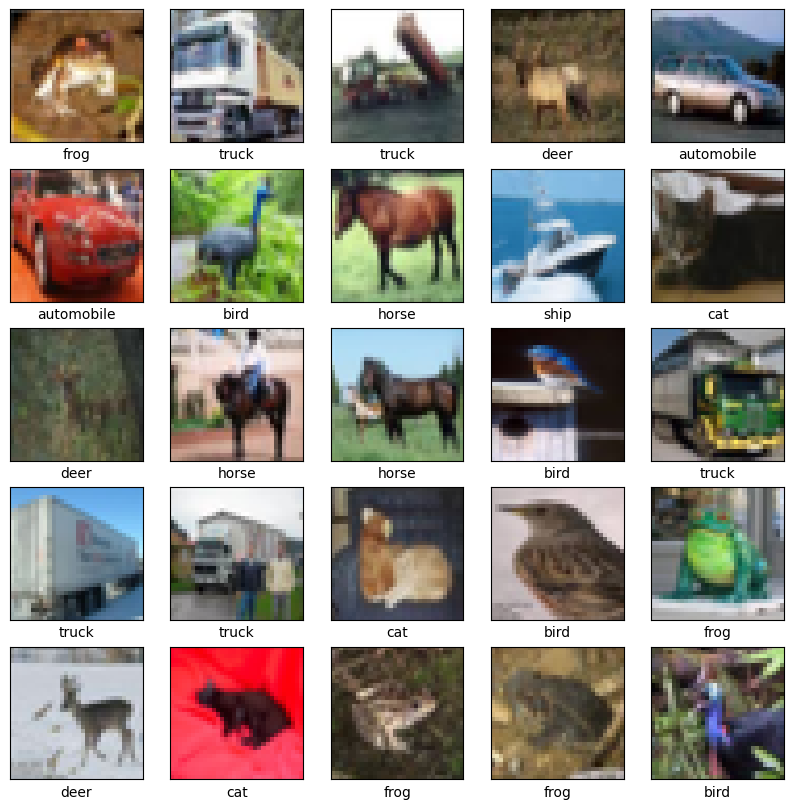

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3509 - loss: 1.7451 - val_accuracy: 0.5266 - val_loss: 1.3061
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5689 - loss: 1.2156 - val_accuracy: 0.6164 - val_loss: 1.0853
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6355 - loss: 1.0298 - val_accuracy: 0.6275 - val_loss: 1.0472
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6725 - loss: 0.9279 - val_accuracy: 0.6481 - val_loss: 1.0341
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7039 - loss: 0.8462 - val_accuracy: 0.6788 - val_loss: 0.9198
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7252 - loss: 0.7778 - val_accuracy: 0.6964 - val_loss: 0.8832
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7485 - loss: 0.7200 - val_accuracy: 0.7009 - val_loss: 0.8691
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7632 - loss: 0.6776 - 

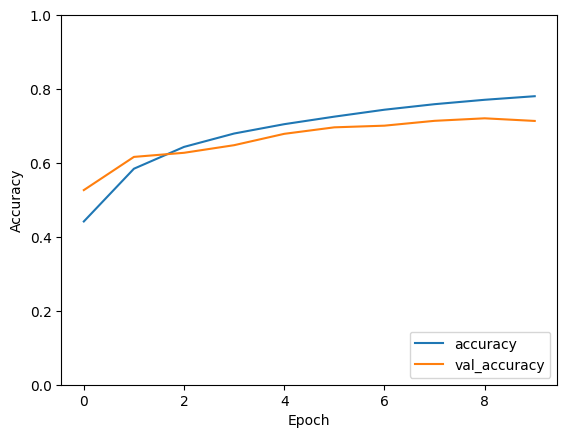

313/313 - 0s - 1ms/step - accuracy: 0.7137 - loss: 0.8547
Test accuracy: 0.713699996471405
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


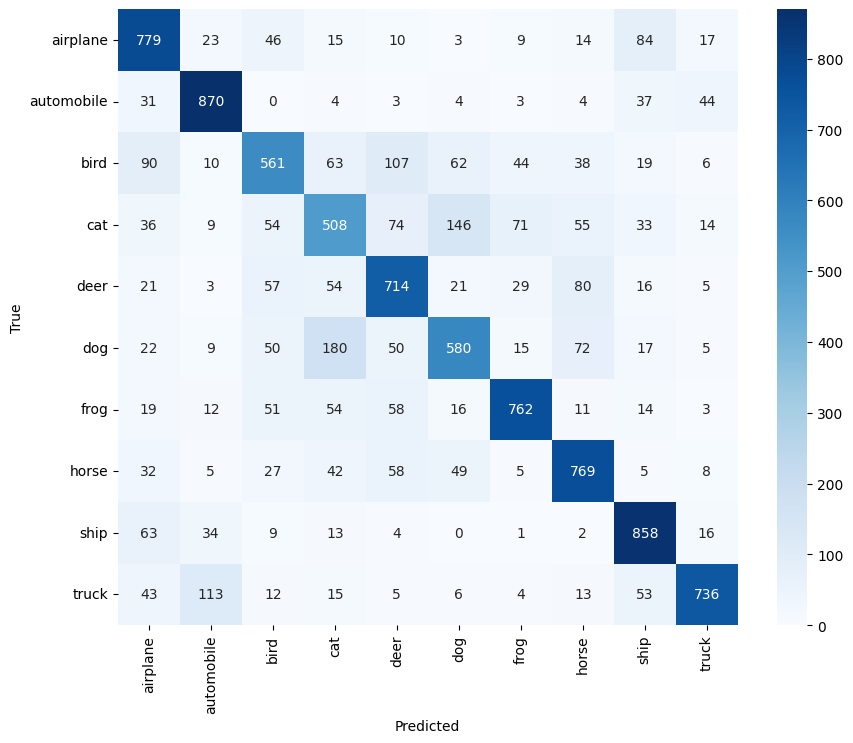

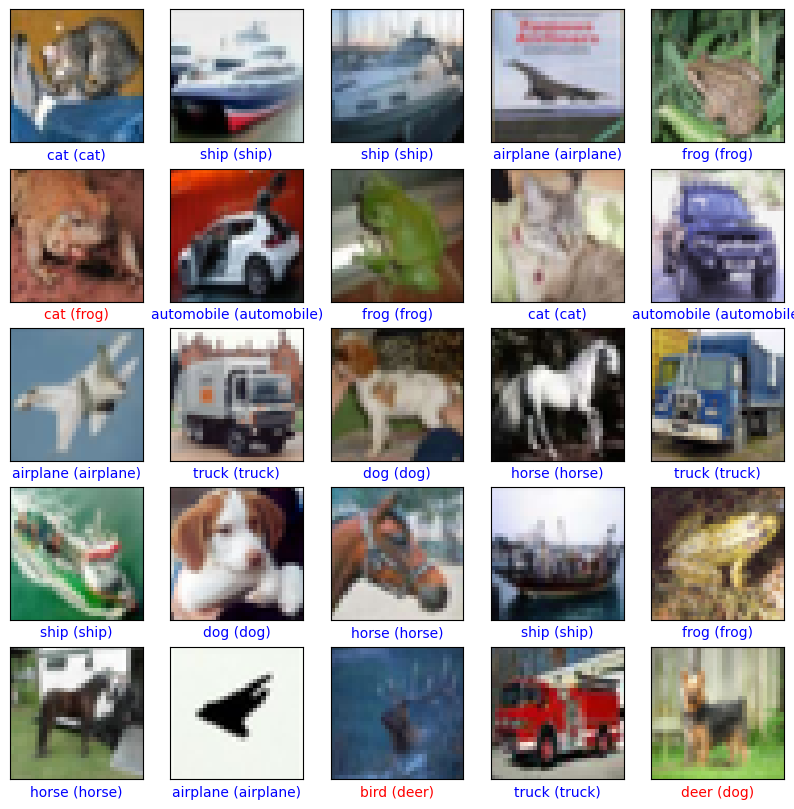

In [13]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import seaborn as sns
from sklearn.metrics import confusion_matrix
import tkinter as tk
from tkinter import filedialog

# 1. Mengimpor pustaka yang diperlukan
print(tf.__version__)

# 2. Memuat dan melakukan prapemrosesan dataset CIFAR-10
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalisasi nilai piksel ke rentang 0-1
train_images, test_images = train_images / 255.0, test_images / 255.0

# 3. Menampilkan beberapa gambar dari dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# 4. Membangun model jaringan saraf konvolusional (CNN)
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

# Menampilkan arsitektur model
model.summary()

# 5. Melatih model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

# 6. Mengevaluasi model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')

# 7. Confusion Matrix
# Prediksi pada data pengujian
y_pred = model.predict(test_images)
y_pred_classes = [np.argmax(element) for element in y_pred]

# Membuat confusion matrix
cm = confusion_matrix(test_labels, y_pred_classes)

# Menampilkan confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# 8. Menampilkan Prediksi Model
# Menampilkan beberapa gambar pengujian bersama dengan prediksi model
num_rows, num_cols = 5, 5
num_images = num_rows * num_cols
plt.figure(figsize=(2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = class_names[y_pred_classes[i]]
    true_label = class_names[test_labels[i][0]]
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel(f"{predicted_label} ({true_label})", color=color)
plt.show()

# 9. Fungsi untuk Menguji Gambar dari Input Pengguna
def load_and_preprocess_image(file_path):
    # Memuat gambar
    img = Image.open(file_path)
    # Mengubah ukuran gambar ke 32x32
    img = img.resize((32, 32))
    # Mengubah gambar menjadi array numpy
    img_array = np.array(img)
    # Normalisasi
    img_array = img_array / 255.0
    # Menambahkan batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

def predict_user_image(file_path):
    img_array = load_and_preprocess_image(file_path)
    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]
    return predicted_class

# Fungsi untuk membuka dialog file dan menguji gambar
def open_file_and_predict():
    root = tk.Tk()
    root.withdraw()  # Menyembunyikan jendela utama Tkinter
    file_path = filedialog.askopenfilename()
    if file_path:
        predicted_class = predict_user_image(file_path)
        print(f'Predicted Class: {predicted_class}')
        # Menampilkan gambar dan prediksi
        img = Image.open(file_path)
        plt.imshow(img)
        plt.title(f'Predicted: {predicted_class}')
        plt.show()

# Memanggil fungsi untuk menguji gambar input pengguna
open_file_and_predict()
